# PCA

# Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.sample(50)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
49,1,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.90,1.120,3.10,1260
167,3,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.720,1.75,685
89,2,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.070,3.21,625
27,1,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.95,1.020,2.77,1285
140,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.770,2.31,600
88,2,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.000,2.75,680
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.970,2.44,466
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.120,3.82,845
19,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.960,3.36,845
147,3,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.540,1.86,625


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe

<bound method NDFrame.describe of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoid

In [6]:
df.shape

(178, 14)

In [13]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [15]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [17]:
df['Type'].unique()

array([1, 2, 3], dtype=int64)

In [19]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [21]:
df[df.duplicated(keep=False)]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


<Axes: >

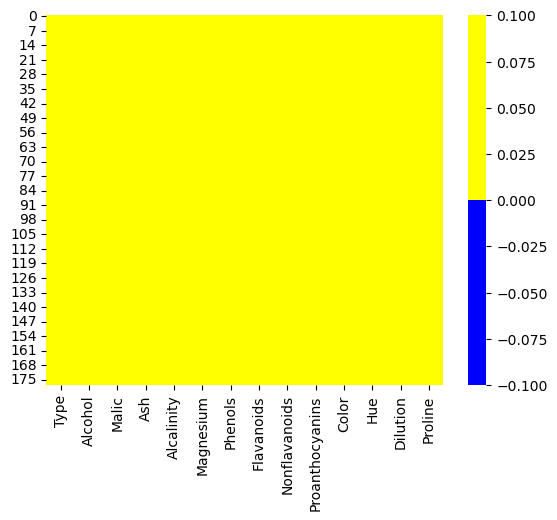

In [23]:
import seaborn as sns
sns.color_palette('Set3')
cols = df.columns
colours = ['blue', 'yellow']
sns.heatmap(df[cols].isnull(),cmap=colours)

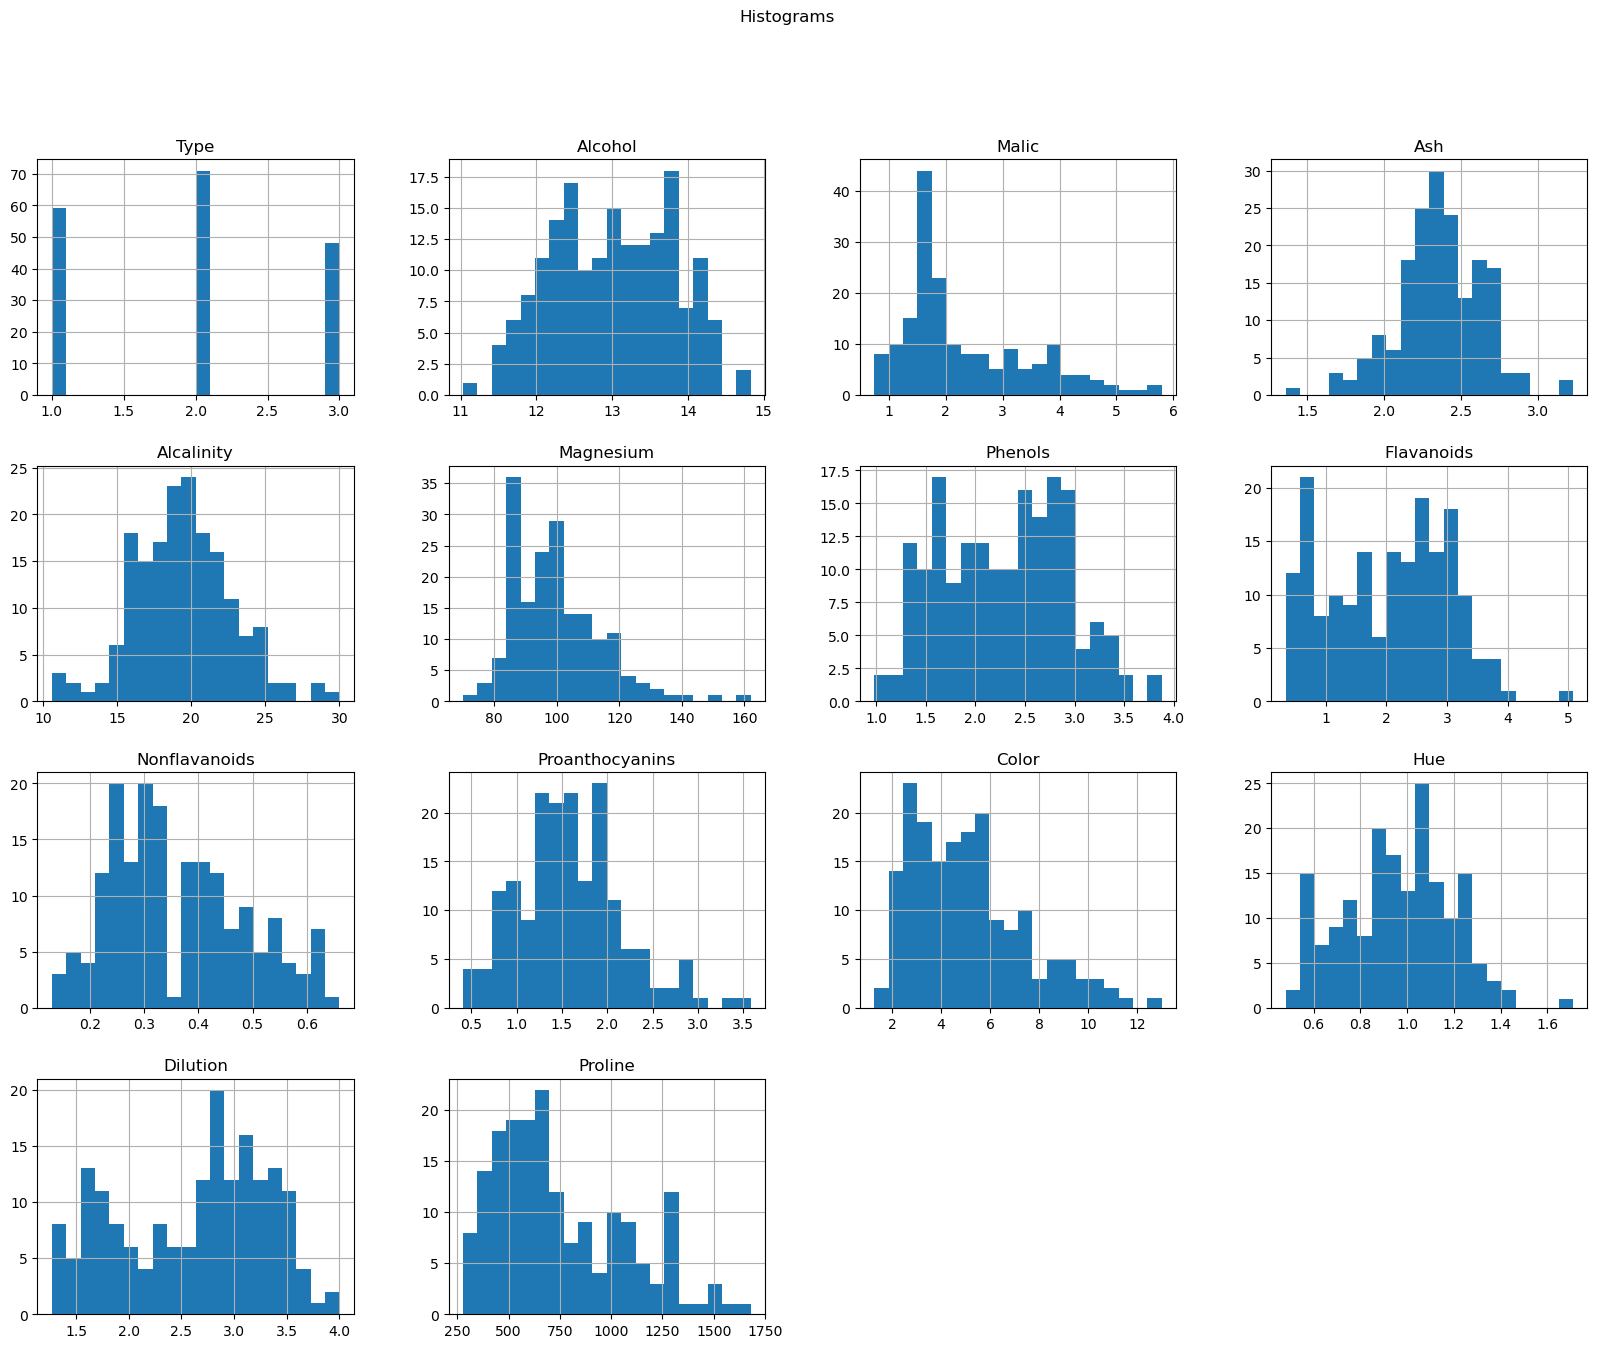

In [24]:
import matplotlib.pyplot as plt
df.hist(bins = 20, figsize = (20,15))
plt.suptitle("Histograms")
plt.show()


<Axes: >

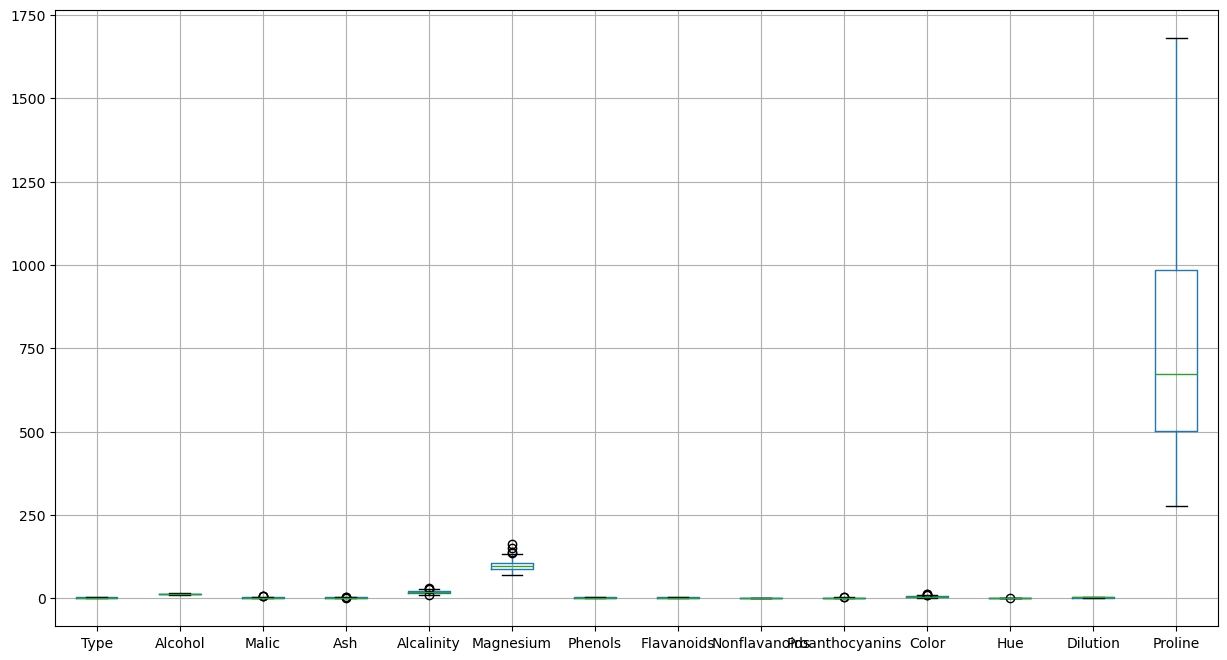

In [26]:
df.boxplot(figsize = (15,8))


In [27]:
df1 = len(df.columns)
df1

14

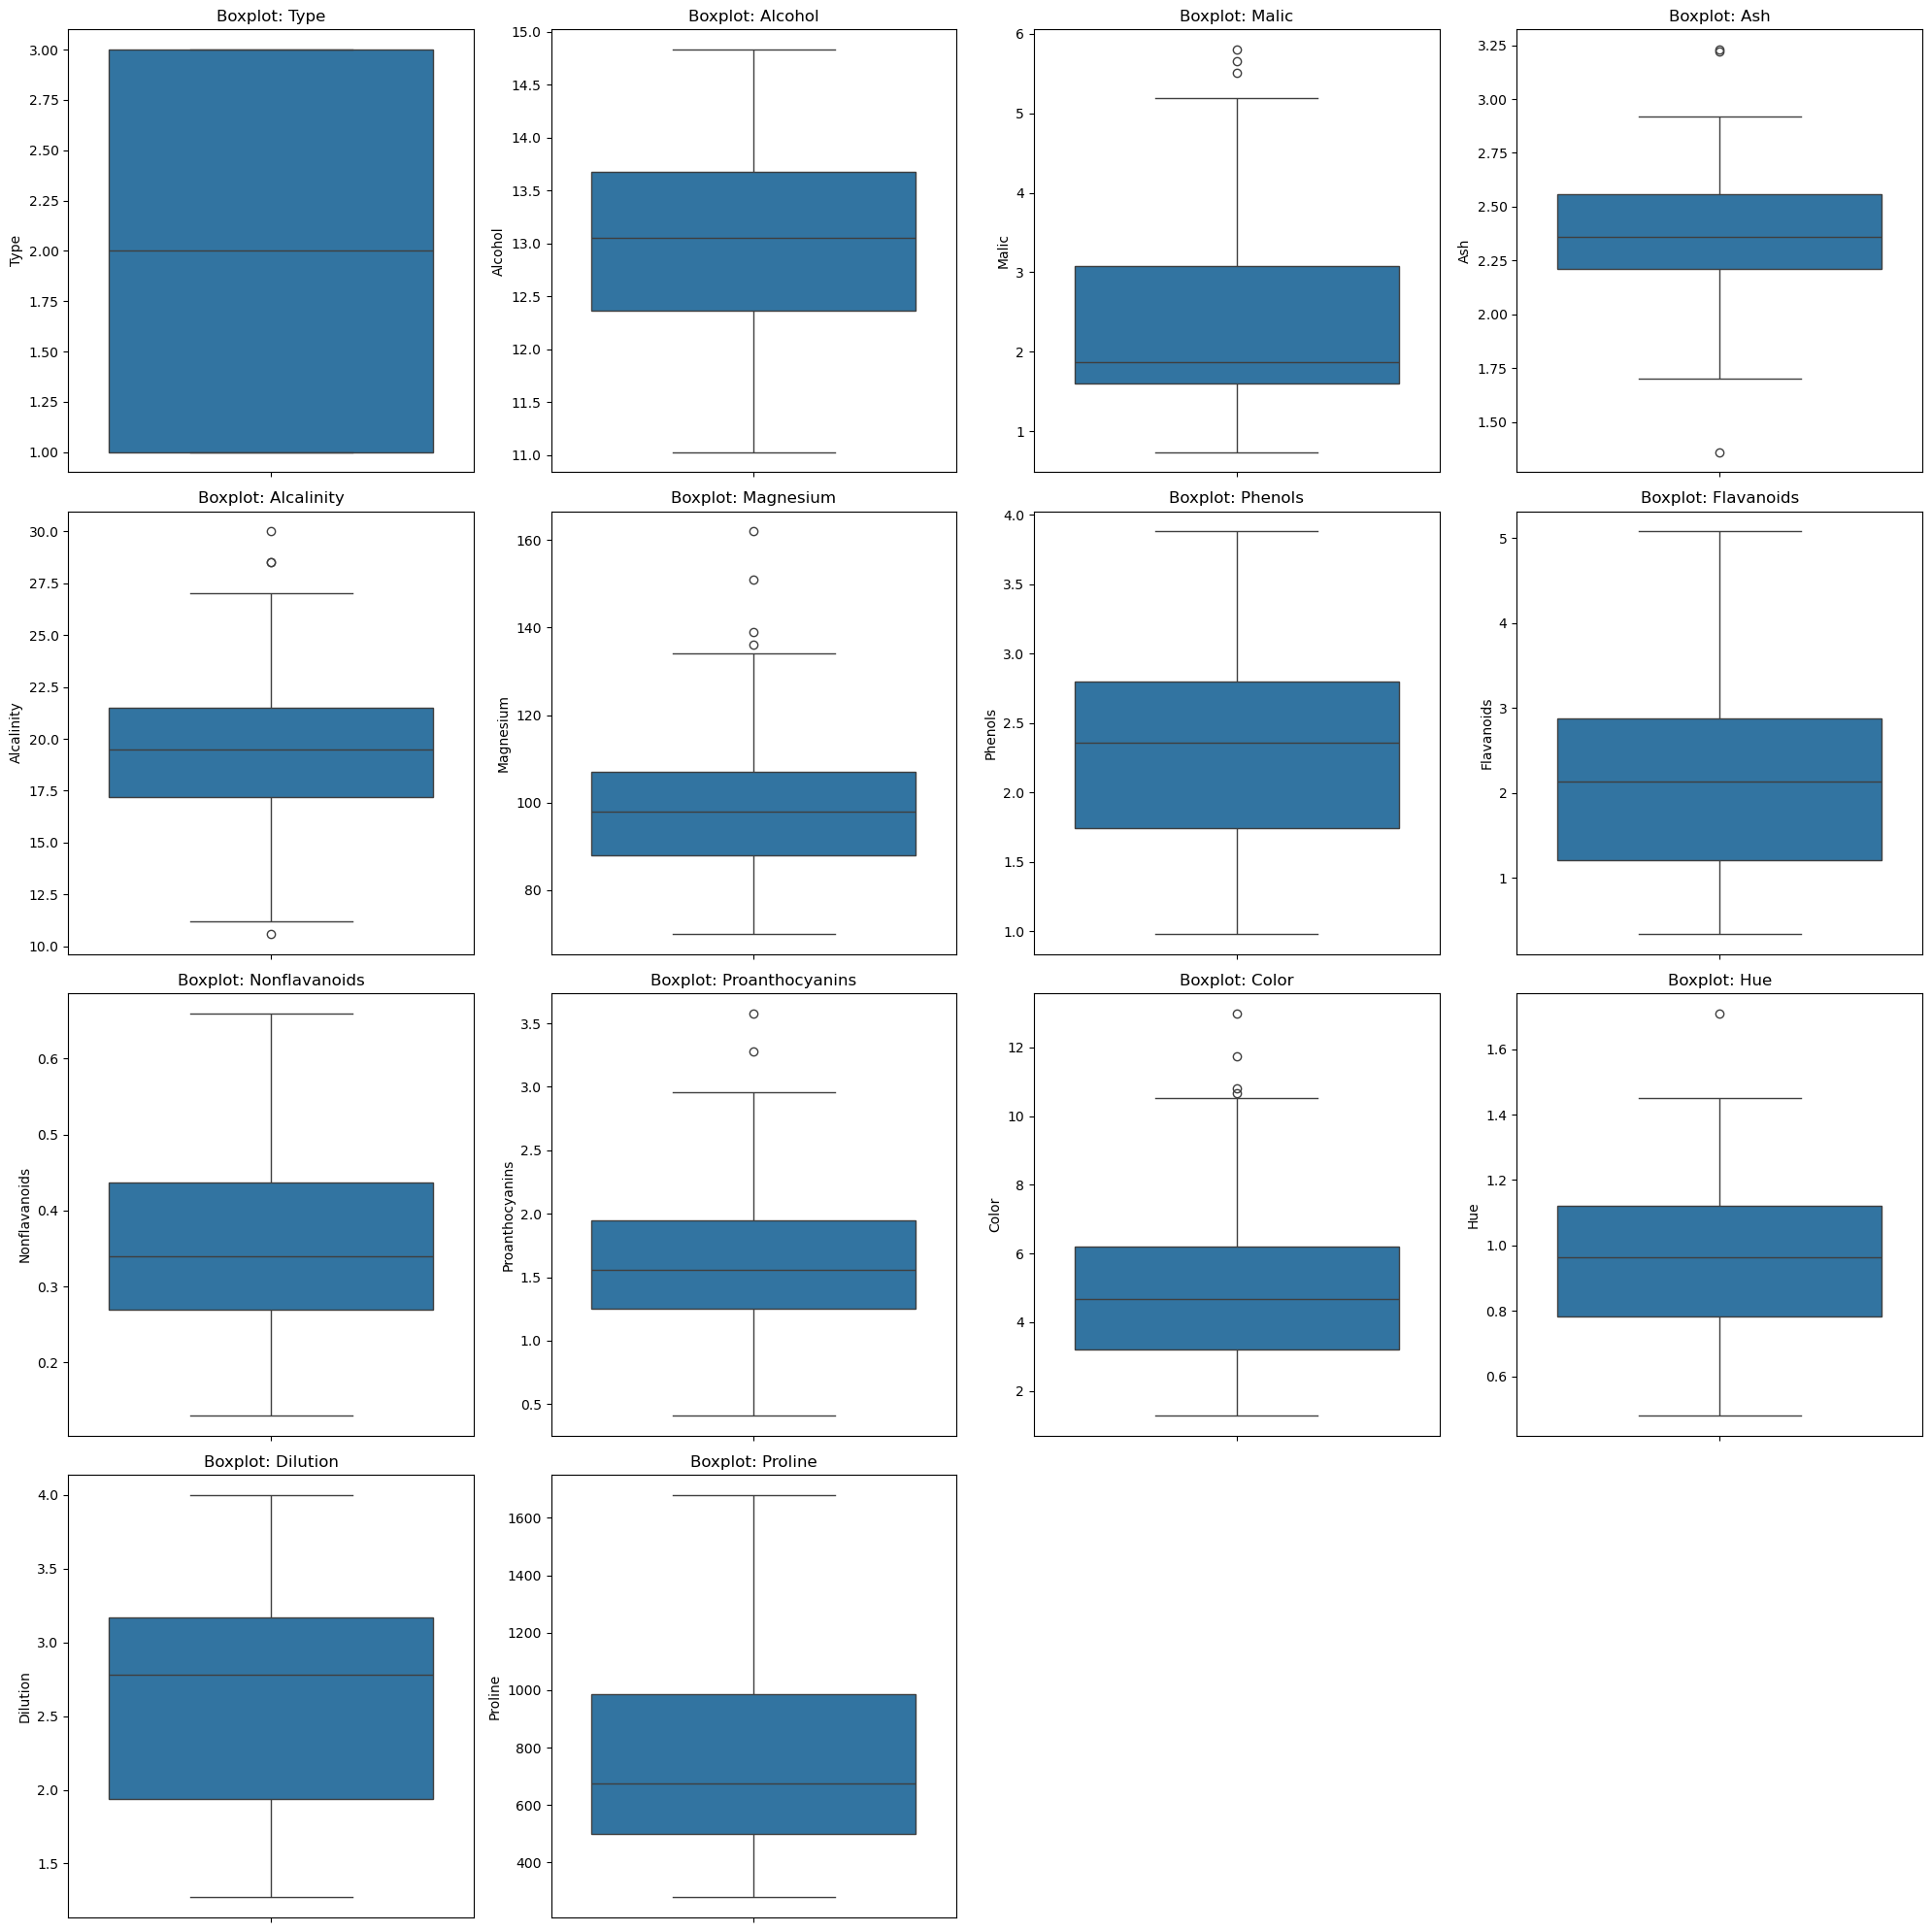

4

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_cols = len(df.columns)  
num_rows = math.ceil(num_cols / 4)  
plt.figure(figsize=(20, num_rows * 5))  

for i, col in enumerate(df.columns, 1): 
    plt.subplot(num_rows, 4, i) 
    sns.boxplot(y=df[col]) 
    plt.title(f'Boxplot: {col}')
plt.tight_layout() 
plt.show()
num_rows

In [32]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<Axes: >

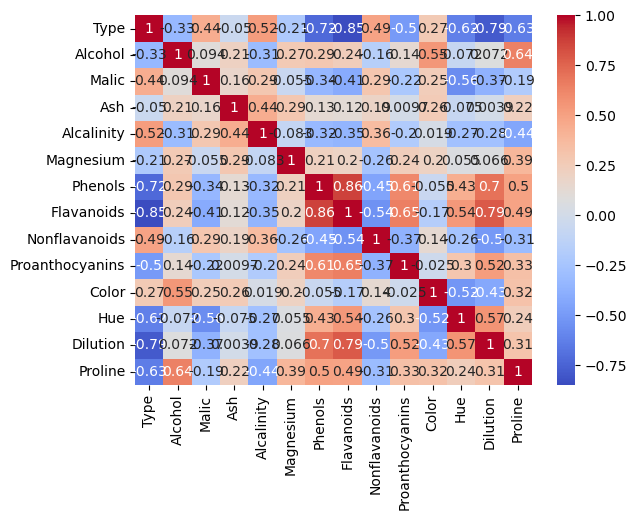

In [33]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

# Dimensionality Reduction with PCA:

In [38]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
df1 = df.iloc[:,1:]
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
df_normal = scale(df1)

In [44]:
df_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [46]:
pca = PCA()
pca_values = pca.fit_transform(df_normal)
pca_values

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [48]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(df_normal)

In [50]:
pca_values

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [52]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [54]:
var1 = np.cumsum(np.round(var,4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [56]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

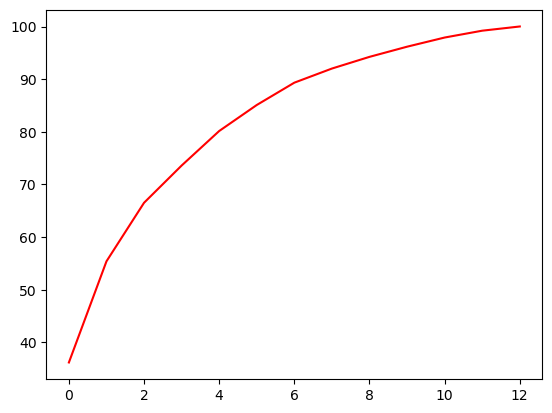

In [58]:
plt.plot(var1,color="red")

In [60]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

In [62]:
 pca_data = pca_values[:,0:2]

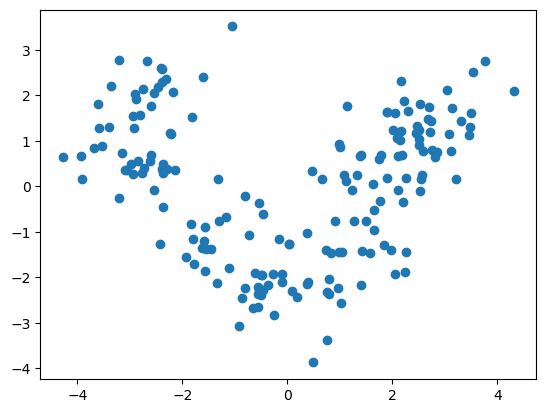

In [64]:
# plot between PCA1 and PCA2
x = pca_values[:,0]
y = pca_values[:,1]

plt.scatter(x,y)

In [66]:
finaldf = pd.concat([df[['Type']],pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2'])],axis=1)
finaldf.sample(50)

,Type,pc1,pc2
6,1,2.449090,1.174850
55,1,2.469329,1.329008
52,1,3.505604,1.612734
115,2,0.482074,-3.871784
34,1,1.410389,0.697934
113,2,-0.457072,-2.269416
170,3,-3.211617,-0.251249
147,3,-3.582641,1.272703
38,1,1.502195,-0.769432
135,3,-3.063842,0.353413


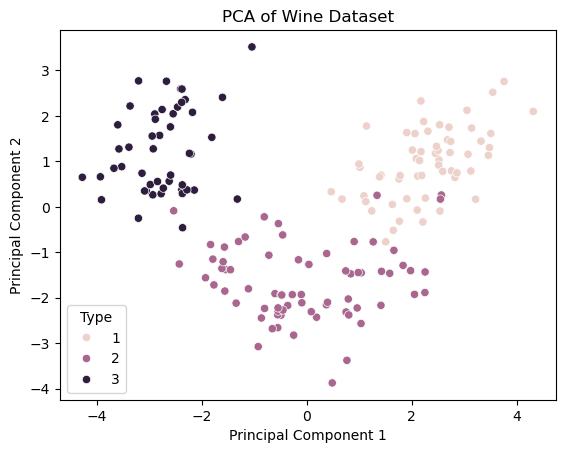

In [68]:
import seaborn as sns
sns.scatterplot(data=finaldf,x='pc1',y='pc2',hue='Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.show()

# K_Means_Clustering

In [71]:
from sklearn.cluster import KMeans

In [73]:
df_k = pd.read_csv('wine.csv')
df_k.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [75]:
'''from sklearn.preprocessing import StandardScaler

exclude_col = "Type"

# Initialize the scaler
scaler = StandardScaler()

# Standardize all columns except the excluded one
df_stand = df_k.copy()
df_stand.loc[:, df_k.columns != exclude_col] = scaler.fit_transform(df_k.loc[:, df_k.columns != exclude_col]).astype(float)

df_stand.head()'''

'from sklearn.preprocessing import StandardScaler\n\nexclude_col = "Type"\n\n# Initialize the scaler\nscaler = StandardScaler()\n\n# Standardize all columns except the excluded one\ndf_stand = df_k.copy()\ndf_stand.loc[:, df_k.columns != exclude_col] = scaler.fit_transform(df_k.loc[:, df_k.columns != exclude_col]).astype(float)\n\ndf_stand.head()'

In [77]:
x = df_k.drop('Type',axis=1)
x.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_scaled = scaler.fit_transform(x)
norm_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [81]:

model = KMeans(n_clusters = 6).fit(norm_scaled)


C:\Users\basan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [83]:
model.inertia_

1062.8876636438163

<function matplotlib.pyplot.show(close=None, block=None)>

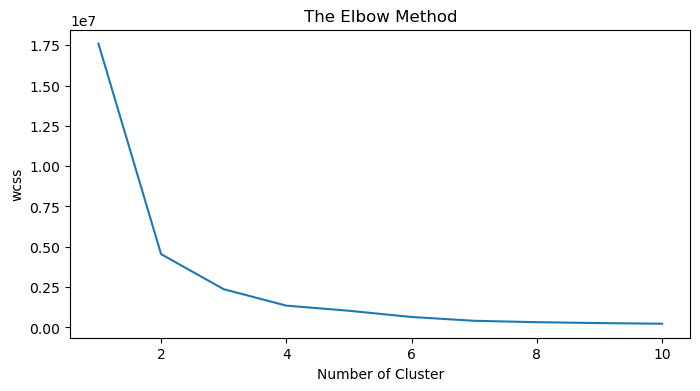

In [85]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster  import KMeans
fig = plt.figure(figsize=(8,4))
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters=i).fit(df_k)
  wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("wcss")
plt.show

In [131]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(norm_scaled)

KMeans(n_clusters=3)

In [133]:
y_names=kmeans.predict(norm_scaled)
y_names

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [135]:
df_k['Cluster'] = y_names

In [137]:
df_k.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [ ]:
import seaborn as sns

# Pair plot to visualize clusters
sns.pairplot(df_k, hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

In [139]:
from sklearn.metrics import silhouette_score ,  davies_bouldin_score

silhouette_avg = silhouette_score(norm_scaled,y_names)
df_in = davies_bouldin_score(norm_scaled,y_names)
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bounldin Index: {df_in:.2f}")

Silhouette Score: 0.28
Davies-Bounldin Index: 1.39


# Clustering with PCA Data:

In [97]:
finaldf.head()

,Type,pc1,pc2
0,1,3.316751,1.443463
1,1,2.209465,-0.333393
2,1,2.516740,1.031151
3,1,3.757066,2.756372
4,1,1.008908,0.869831


In [99]:
pca = finaldf.drop('Type',axis=1)

pca.head()

,pc1,pc2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_scaled1 = scaler.fit_transform(pca)
norm_scaled1

array([[ 1.52895179,  0.91347898],
       [ 1.01851648, -0.21098391],
       [ 1.16016384,  0.65255242],
       [ 1.73192758,  1.74433875],
       [ 0.46508542,  0.55046259],
       [ 1.40610238,  1.34313751],
       [ 1.1289784 ,  0.7434906 ],
       [ 0.94935673,  1.01821406],
       [ 1.15745981,  0.58099081],
       [ 1.2693642 ,  0.49958669],
       [ 1.60408482,  0.82416684],
       [ 0.80890388,  0.38728286],
       [ 0.97426132,  0.4276131 ],
       [ 1.59413696,  0.71550631],
       [ 1.98810193,  1.32641441],
       [ 1.06264288,  1.05212704],
       [ 1.00122533,  1.47280883],
       [ 0.87538544,  1.03239332],
       [ 1.63278002,  1.59370527],
       [ 0.96092053,  0.67152916],
       [ 1.44028332,  0.49797892],
       [ 0.50088576,  0.15298467],
       [ 1.16868454, -0.0581203 ],
       [ 0.75830474, -0.32672127],
       [ 0.81204912, -0.20070411],
       [ 0.45640547,  0.59529067],
       [ 0.81836534,  0.43423816],
       [ 0.56950425, -0.05683337],
       [ 1.00880892,

In [103]:
pca_kmean = KMeans(n_clusters = 2).fit(finaldf)

In [105]:
pca_kmean.inertia_

671.5347282636401

<function matplotlib.pyplot.show(close=None, block=None)>

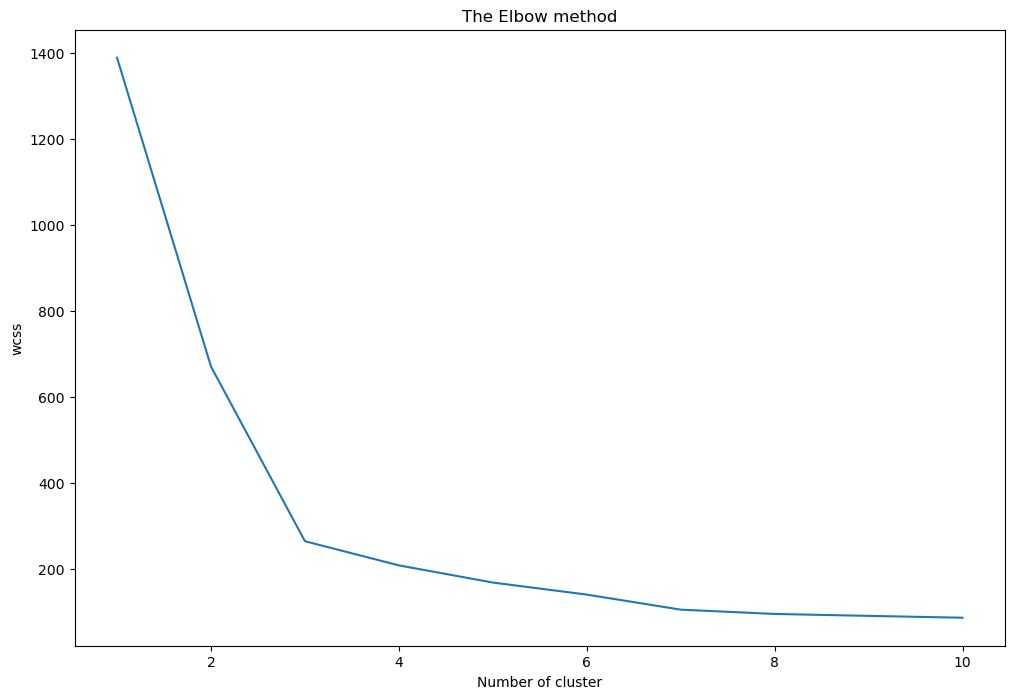

In [107]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(12,8))
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i).fit(finaldf)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show

In [109]:
clf = KMeans(n_clusters = 3)
clf.fit(finaldf)

KMeans(n_clusters=3)

In [111]:
y_pca = clf.predict(finaldf)
y_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [113]:
finaldf['Cluster'] = y_pca
finaldf.sample(50)

,Type,pc1,pc2,Cluster
15,1,2.305188,1.662552,0
102,2,-0.161174,-1.164483,2
106,2,-0.366267,-2.169353,2
82,2,-0.494877,-2.381244,2
146,3,-4.280639,0.649671,1
165,3,-3.530032,0.882527,1
54,1,2.146988,1.016752,0
141,3,-2.286561,0.372508,1
156,3,-2.889826,1.925219,1
111,2,-0.278703,-1.930568,2


In [123]:
final_p=finaldf.iloc[:,1:].groupby(finaldf.Cluster).count()

In [125]:
final_p

,pc1,pc2,Cluster
Cluster,,,
0,62,62,62
1,49,49,49
2,67,67,67


In [127]:
from sklearn.metrics import silhouette_score ,  davies_bouldin_score

silhouette_avg = silhouette_score(norm_scaled1,y_pca)
df_in = davies_bouldin_score(norm_scaled1,y_pca)
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bounldin Index: {df_in:.2f}")

Silhouette Score: 0.58
Davies-Bounldin Index: 0.57


# Comparison and Analysis

# Similarities And Differences